In [9]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv('cleaned_data.csv')
data=data.rename(columns={'FORECAST_TIMESTAMP':'date'})
data['date']=pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dlwrfsurface_0,...,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,TOTAL_KWH_ENERGIA
date,,,,,,,,,,,,,,,,,,,,,
2023-07-24 11:00:00,40.0000,-4.0000,6.9897,1.5245,19.6000,0.0051,301.6679,18000.0000,300.2440,318.4077,...,0.8000,298.8787,301.6321,291.7015,324.0064,0.0000,316.1000,7.9791,1.7635,83.1500
2023-07-24 12:00:00,40.0000,-4.0000,7.5264,1.3018,18.4000,0.0053,303.3656,21600.0000,301.4709,323.1077,...,1.7000,300.5000,303.3635,291.7015,325.8034,0.0000,318.7000,8.8017,1.6231,115.6600
2023-07-24 13:00:00,40.0000,-4.0000,8.5061,1.2944,18.2000,0.0057,304.8546,3600.0000,302.7032,357.8000,...,8.8000,301.9956,304.8151,303.4000,326.0966,0.0000,319.2773,9.9773,1.6630,129.9800
2023-07-24 14:00:00,40.0000,-4.0000,9.3922,1.2831,17.4000,0.0057,305.6815,7200.0000,303.5440,362.2487,...,5.0000,302.9440,305.6897,303.4000,326.7910,0.0000,318.5159,11.1522,1.7117,134.3500
2023-07-24 15:00:00,40.0000,-4.0000,10.1670,1.5559,18.3000,0.0061,305.9762,10800.0000,303.8346,365.1000,...,35.8000,303.4323,305.9956,303.4000,329.9559,0.0000,316.4353,12.2569,2.0111,133.9000


In [40]:
y=data['TOTAL_KWH_ENERGIA']
x=data.drop('TOTAL_KWH_ENERGIA', axis=1)

### PCA

In [41]:
scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)

In [42]:
pca=PCA()

components=pca.fit_transform(X_scaled)

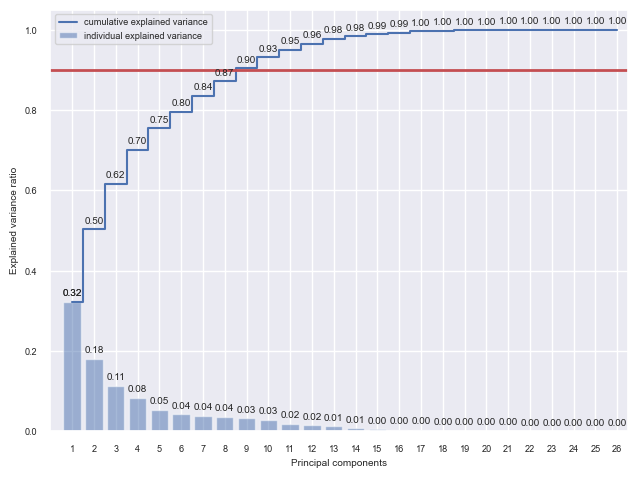

In [43]:
plt.bar(range(1,pca.n_components_+1), pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,pca.n_components_+1), [pca.explained_variance_ratio_[:y].sum() for y in range(1,pca.n_components_+1)], where='mid',label='cumulative explained variance')
plt.axhline(y=0.90, linewidth=2, color = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
for i, ratio in enumerate(pca.explained_variance_ratio_):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
for i, ratio in enumerate([pca.explained_variance_ratio_[:y].sum() for y in range(1,pca.n_components_+1)]):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')

plt.xlim([0, pca.n_components_+0.5])
plt.xticks(range(1, pca.n_components_ + 1))
plt.legend(loc='best')
plt.tight_layout()

In [44]:
pca.n_components_

26

In [45]:
zip(range(pca.n_components_+1),pca.explained_variance_ratio_)

In [46]:
{component+1:eigen*pca.n_components_ for component,eigen in zip(range(pca.n_components_),pca.explained_variance_ratio_)}

{1: 8.386045209590437,
 2: 4.685921962799904,
 3: 2.960650063265556,
 4: 2.1731317861170747,
 5: 1.4052012761232904,
 6: 1.0910841918810432,
 7: 1.0166796662364552,
 8: 0.9314603633234863,
 9: 0.8390650719626738,
 10: 0.7234659069479749,
 11: 0.4655764784639824,
 12: 0.3927232091526511,
 13: 0.3202589591281744,
 14: 0.17963469722847036,
 15: 0.12488231656126238,
 16: 0.11211982996269872,
 17: 0.08873880770566,
 18: 0.04466870780697022,
 19: 0.017575330729934356,
 20: 0.010801313394007908,
 21: 0.009044736217987693,
 22: 0.008459317801629307,
 23: 0.007798191840133458,
 24: 0.0031256744861587063,
 25: 0.0018863824663236499,
 26: 5.488060564525206e-07}

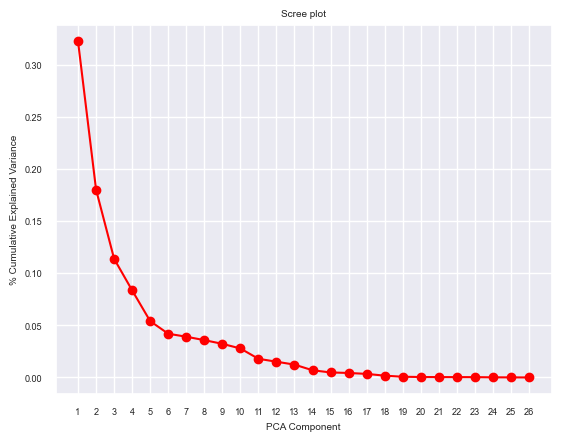

In [47]:
# Scree plot 
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    pca.explained_variance_ratio_,
    c='red', marker='o'
)
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))   
plt.xlabel('PCA Component')
plt.ylabel('% Cumulative Explained Variance')
plt.title('Scree plot')
plt.show()

The best solution seems to be 5 components

In [48]:
#Get the final components

pca_final = PCA(5)
final_components = pca_final.fit_transform(X_scaled)

In [49]:
# Shows Factor loadings = correlations between variables and factors
print ("")
print ("Factor loadings:")

pd.set_option('display.float_format', '{:.4f}'.format)

dfloadings=pd.DataFrame(
    data    = pca_final.components_,
    columns = x.columns,
)

index_list=[]
for n in range(5):
    index_list.append("PC"+str(n+1))

dfloadings.index = index_list

# Hide low values so that it is clearer
dfloadings.T.where(abs(dfloadings.T) > 0.25  , "")  # we hide values lower than 0.25 to better display the relations


Factor loadings:


,PC1,PC2,PC3,PC4,PC5
LATITUDE,,,,0.4576,0.3276
LONGITUDE,,,,,
10uheightAboveGround_10,,0.2633,,-0.3482,
10vheightAboveGround_10,,0.3005,,,0.5102
2rheightAboveGround_2,,,,,
2shheightAboveGround_2,,,0.3957,,
2theightAboveGround_2,0.3389,,,,
SUNSDsurface_0,,,,,
aptmpheightAboveGround_2,0.3375,,,,
dlwrfsurface_0,0.2931,,,,


In [50]:
# Communalities
commun=[]

for col in dfloadings.columns:
    commun.append((dfloadings.iloc[0:3][col]**2).sum())
    
dfcommun = pd.DataFrame(commun,index=dfloadings.columns, columns=["Communalities"])
dfcommun.sort_values("Communalities", ascending=False)

,Communalities
qheightAboveGround_80,0.2240
2shheightAboveGround_2,0.2222
pwatatmosphereSingleLayer_0,0.1757
2rheightAboveGround_2,0.1669
presheightAboveGround_80,0.1445
spsurface_0,0.1439
msletmeanSea_0,0.1435
uheightAboveGround_80,0.1311
10uheightAboveGround_10,0.1305
dswrfsurface_0,0.1225


In [51]:
dfcommun.mean()

Communalities   0.1154
dtype: float64

In [52]:
pca_final.components_

array([[ 0.0031363 ,  0.00164577, -0.03436495,  0.05518317, -0.24875371,
         0.14914157,  0.33890869,  0.13472059,  0.33752224,  0.29308993,
         0.18586655, -0.01588572, -0.16235837, -0.04430784,  0.22123903,
         0.14652573, -0.05305519, -0.06770474,  0.33099801,  0.3316211 ,
         0.32880476, -0.07608648, -0.00686115,  0.31541152, -0.04130767,
         0.05655768],
       [ 0.05567592,  0.0056282 ,  0.26331996,  0.30046701,  0.21765526,
         0.20830539, -0.06475265, -0.04515795, -0.07383991,  0.15086629,
        -0.06121005,  0.31455635, -0.30030909, -0.28884196,  0.18329417,
         0.20948727, -0.28674013,  0.23253975, -0.08717796, -0.06715912,
        -0.05070683,  0.11393897,  0.17110975, -0.06196755,  0.27285773,
         0.2944881 ],
       [-0.15381192,  0.00453399, -0.2450052 ,  0.00764602,  0.24012504,
         0.39566888, -0.03761771, -0.23778916, -0.00628861,  0.11707656,
        -0.29024344, -0.07580331,  0.16405333,  0.24302695,  0.30524734,
       

In [53]:
loadings= pca_final.components_

# Step 1: Compute Communality for Each Variable
communalities = np.sum(loadings.T** 2, axis=1)  # Sum of squared loadings for first 5 factors

# Step 2: Compute Total Communality
total_communality = np.sum(communalities)

print("Communalities for each variable:", communalities)
print("Total Communality for 5 factors:", total_communality)

Communalities for each variable: [0.34350957 0.01600734 0.28179271 0.39965298 0.16832584 0.23222897
 0.12074348 0.120947   0.11959681 0.12891406 0.16312648 0.19462212
 0.20056218 0.31542527 0.18470688 0.23355082 0.31450859 0.07721922
 0.11741787 0.11767572 0.11277291 0.19199412 0.05468093 0.11813076
 0.26985717 0.40203019]
Total Communality for 5 factors: 4.999999999999996


PCA Seems to lead to nowhere, I'll ignore it

### Correlation filtering

<Axes: >

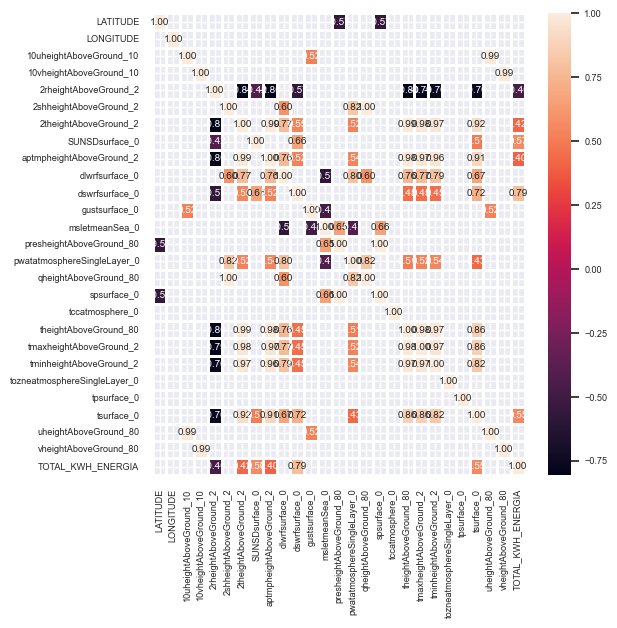

In [54]:
corr_matrix = data.corr()
sns.set_theme(font_scale=0.6)

high_corr = corr_matrix[abs(corr_matrix) > 0.4]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

In [55]:
relevant_predictors=list(high_corr[~high_corr['TOTAL_KWH_ENERGIA'].isna()].index)

In [75]:
data_filtered=data[relevant_predictors]
data_filtered

,2rheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dswrfsurface_0,tsurface_0,TOTAL_KWH_ENERGIA
date,,,,,,,
2023-07-24 11:00:00,19.6000,301.6679,18000.0000,300.2440,567.6600,316.1000,83.1500
2023-07-24 12:00:00,18.4000,303.3656,21600.0000,301.4709,633.5520,318.7000,115.6600
2023-07-24 13:00:00,18.2000,304.8546,3600.0000,302.7032,980.8400,319.2773,129.9800
2023-07-24 14:00:00,17.4000,305.6815,7200.0000,303.5440,959.7000,318.5159,134.3500
2023-07-24 15:00:00,18.3000,305.9762,10800.0000,303.8346,921.1000,316.4353,133.9000
...,...,...,...,...,...,...,...
2024-08-31 19:00:00,49.9000,300.0157,2440.7000,300.2170,8.6600,298.6993,6.6933
2024-08-31 20:00:00,53.7000,299.0000,2440.8000,298.9573,4.3400,297.0000,0.0000
2024-08-31 21:00:00,55.4000,298.4366,2441.0000,298.4121,2.8960,296.5000,0.4867


In [76]:
data_filtered['month']=(data_filtered.index).month
data_filtered['day']=(data_filtered.index).day
data_filtered['hour']=(data_filtered.index).hour

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21552\3272098205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month']=(data_filtered.index).month
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21552\3272098205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['day']=(data_filtered.index).day
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21552\3272098205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [77]:
data_filtered

,2rheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dswrfsurface_0,tsurface_0,TOTAL_KWH_ENERGIA,month,day,hour
date,,,,,,,,,,
2023-07-24 11:00:00,19.6000,301.6679,18000.0000,300.2440,567.6600,316.1000,83.1500,7,24,11
2023-07-24 12:00:00,18.4000,303.3656,21600.0000,301.4709,633.5520,318.7000,115.6600,7,24,12
2023-07-24 13:00:00,18.2000,304.8546,3600.0000,302.7032,980.8400,319.2773,129.9800,7,24,13
2023-07-24 14:00:00,17.4000,305.6815,7200.0000,303.5440,959.7000,318.5159,134.3500,7,24,14
2023-07-24 15:00:00,18.3000,305.9762,10800.0000,303.8346,921.1000,316.4353,133.9000,7,24,15
...,...,...,...,...,...,...,...,...,...,...
2024-08-31 19:00:00,49.9000,300.0157,2440.7000,300.2170,8.6600,298.6993,6.6933,8,31,19
2024-08-31 20:00:00,53.7000,299.0000,2440.8000,298.9573,4.3400,297.0000,0.0000,8,31,20
2024-08-31 21:00:00,55.4000,298.4366,2441.0000,298.4121,2.8960,296.5000,0.4867,8,31,21


In [78]:
lats=[40,40.25,40.5]
longs=[-4,-3.75,-3.5]

locations=[(lat,long) for long in longs for lat in lats]
locations

[(40, -4),
 (40.25, -4),
 (40.5, -4),
 (40, -3.75),
 (40.25, -3.75),
 (40.5, -3.75),
 (40, -3.5),
 (40.25, -3.5),
 (40.5, -3.5)]

In [79]:
# df_names=['data'+str(i+1) for i in range(9)]

# dataframes={df_names[i]:data_filtered[(data_filtered['LATITUDE']==locations[i][0])&(data_filtered['LONGITUDE']==locations[i][1])] for i in range(len(locations))}


In [80]:
# dataframes['data1'].index

In [81]:
# import warnings
# warnings.filterwarnings('ignore')

# scores={}

# for data in dataframes:
#     train=dataframes[data][dataframes[data].index<'2024-09-01 00:00:00']
#     test=dataframes[data][(dataframes[data].index>='2024-09-01 00:00:00')&(dataframes[data].index<'2024-10-01 00:00:00')]

#     train.dropna(inplace=True)
#     test.dropna(subset=test.columns.drop('TOTAL_KWH_ENERGIA'), inplace=True)

#     x_train, y_train= train.drop('TOTAL_KWH_ENERGIA', axis=1), train['TOTAL_KWH_ENERGIA']
#     x_test, y_test=test.drop('TOTAL_KWH_ENERGIA', axis=1), test['TOTAL_KWH_ENERGIA']

    
#     #Define the model

#     xgb=XGBRegressor(objective='reg:squarederror', learning_rate=0.15, n_estimators=250, subsample=0.4)

#     xgb.fit(x_train, y_train)

#     preds=xgb.predict(x_train)

#     preds=[0 if pred<2 else pred for pred in preds]

#     mae=mean_absolute_error(y_train,preds)

#     print(f'MAE for {data}:{mae:.2f}')
#     scores[data]=mae

In [82]:
# best=min(scores, key=scores.get)

# best_config=dataframes[best]

In [83]:
best_config=data_filtered.reset_index().groupby('date', as_index=False).mean().set_index('date')
best_config

,2rheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dswrfsurface_0,tsurface_0,TOTAL_KWH_ENERGIA,month,day,hour
date,,,,,,,,,,
2023-07-24 11:00:00,17.5778,301.8234,18000.0000,300.3329,568.7533,315.4667,82.5289,7.0000,24.0000,11.0000
2023-07-24 12:00:00,16.9889,303.1878,21600.0000,301.3598,634.4587,317.4000,115.6600,7.0000,24.0000,12.0000
2023-07-24 13:00:00,17.0778,304.3324,3600.0000,302.3032,979.8578,318.0329,129.9800,7.0000,24.0000,13.0000
2023-07-24 14:00:00,17.2667,305.1037,7200.0000,302.9885,956.2622,317.4715,134.3500,7.0000,24.0000,14.0000
2023-07-24 15:00:00,17.4111,305.5539,10800.0000,303.4013,914.7489,315.9353,133.9000,7.0000,24.0000,15.0000
...,...,...,...,...,...,...,...,...,...,...
2024-08-31 19:00:00,49.7889,299.6935,2591.6222,299.8504,22.5578,298.7993,16.2415,8.0000,31.0000,19.0000
2024-08-31 20:00:00,51.9000,299.1778,2591.6000,299.2240,11.2822,298.1111,3.6744,8.0000,31.0000,20.0000
2024-08-31 21:00:00,53.0444,298.8588,2591.6667,298.8565,7.5200,297.7778,4.6563,8.0000,31.0000,21.0000


In [84]:
train=best_config[best_config.index<'2024-09-01 00:00:00']
test=best_config[(best_config.index>='2024-09-01 00:00:00')&(best_config.index<'2024-10-01 00:00:00')]

train.dropna(inplace=True)

test.dropna(subset=test.columns.drop('TOTAL_KWH_ENERGIA'), inplace=True)

x_train, y_train= train.drop('TOTAL_KWH_ENERGIA', axis=1), train['TOTAL_KWH_ENERGIA']
x_test, y_test=test.drop('TOTAL_KWH_ENERGIA', axis=1), test['TOTAL_KWH_ENERGIA']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21552\531256319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(subset=test.columns.drop('TOTAL_KWH_ENERGIA'), inplace=True)


In [85]:
#Define the model

xgb=XGBRegressor(objective='reg:squarederror', learning_rate=0.15, n_estimators=250, subsample=0.4)

xgb.fit(x_train, y_train)

preds=xgb.predict(x_train)

preds=[0 if pred<2 else pred for pred in preds]

mae=mean_absolute_error(y_train,preds)

print(f'MAE:{mae:.2f}')

MAE:3.91


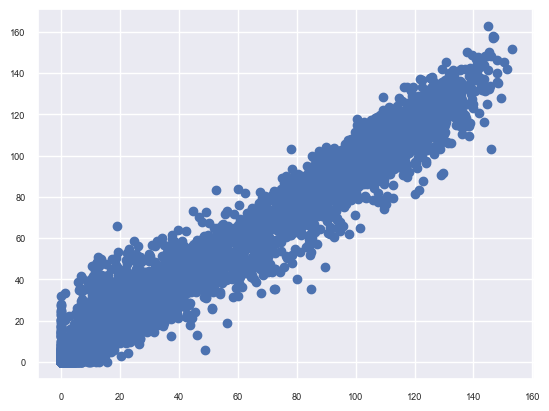

In [86]:
plt.scatter(y_train,preds)

In [25]:
predicted_values=xgb.predict(x_test)

predicted_values=[0 if pred<2 else pred for pred in predicted_values]

In [26]:
len(predicted_values)

720

In [27]:
res=pd.Series(predicted_values, name='Predictions')
res.to_excel('predictions.xlsx')